# BASICS 03 - Training and evaluating accuracy

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/Users/laurentperrinet/quantic/science/HomeHots/HOTS_clone_laurent/HOTS


In [2]:
import pickle
from Network import network

# Defining the network and training

In [3]:
hots = network(algo='lagorce', krnlinit='first', tau=20.)
hots.learninglagorce(diginit=True)

100%|██████████| 297828/297828 [02:51<00:00, 1737.32it/s]


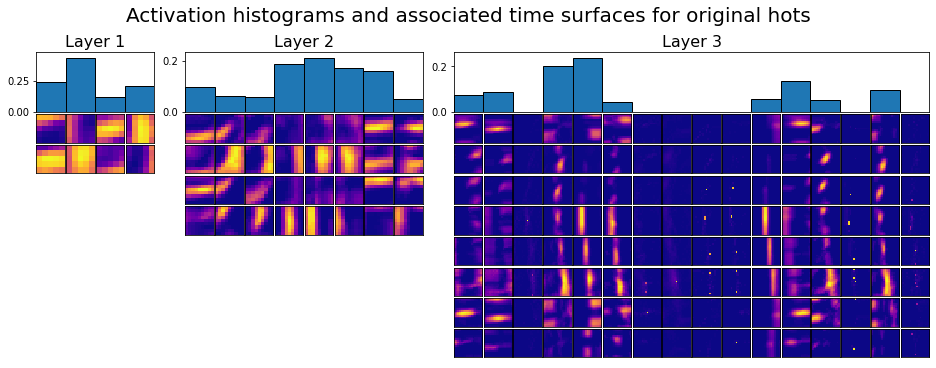

In [4]:
fig = hots.plotlayer()

# Running the Network on training samples

In [5]:
trainmap = hots.traininglagorce()

100%|██████████| 520844/520844 [04:55<00:00, 1763.90it/s]


# Runing the Network on testing samples

In [6]:
testmap, accuracy = hots.testinglagorce(trainmap)

100%|██████████| 558235/558235 [06:23<00:00, 1456.60it/s]


bhatta:92.5% - eucli:92.5% - norm:92.5%


In [7]:
%mkdir -p ../Records/EXP_01_LagorceKmeans

In [8]:
fname = "../Records/EXP_01_LagorceKmeans/2020-11-26-hots_validation.pkl"
with open(fname, 'wb') as file:
    pickle.dump([hots, trainmap, testmap], file, pickle.HIGHEST_PROTOCOL)